# Three-Base Periodicity Property
### Author: Shane Barratt

DNA is inherently a signal. Thus, you can apply conventional signal processing methods to it such as the Fourier Transform. In this notebook, I try to illustrate the reason behind a puzzling phenomena: **Coding stretches in DNA sequences have a 3-periodic structure that non-coding ones do not.**

Assumptions:
- python 2 or 3
- matplotlib installed
- numpy installed

In [8]:
# Imports

import random

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### The Genetic Code

A DNA sequence is essentially a string of characters from the set {'A','C','T','G'}.

In [ ]:
nucleotides = ['A','C','T','G']

DNA is used to make proteins. To make proteins, an RNA reads the DNA in 3-long sections at a time, called codons. Each codon functionally corresponds to one of the 21 amino acids. For example, 'ATG' corresponds to Methionine.

However, there is some redundancy in the code as seen below in `amino_acid_codon_map`. Some amino acids have many codons which map to them.

In [35]:
amino_acid_codon_map = {
    'Isoleucine': ['ATT', 'ATC', 'ATA'],
    'Leucine': ['CTT', 'CTC', 'CTA', 'CTG', 'TTA', 'TTG'],
    'Valine': ['GTT', 'GTC', 'GTA', 'GTG'],
    'Phenylalanine': ['TTT', 'TTC'],
    'Methionine': ['ATG'],
    'Cysteine': ['TGT', 'TGC'],
    'Alanine': ['GCT', 'GCC', 'GCA', 'GCG'],
    'Glycine': ['GGT', 'GGC', 'GGA', 'GGG'],
    'Proline': ['CCT', 'CCC', 'CCA', 'CCG'],
    'Threonine': ['ACT', 'ACC', 'ACA', 'ACG'],
    'Serine': ['TCT', 'TCC', 'TCA', 'TCG', 'AGT', 'AGC'],
    'Tyrosine': ['TAT', 'TAC'],
    'Tryptophan': ['TGG'],
    'Glutamine': ['CAA', 'CAG'],
    'Asparagine': ['AAT', 'AAC'],
    'Histidine': ['CAT', 'CAC'],
    'Glutamic acid': ['GAA', 'GAG'],
    'Aspartic acid': ['GAT', 'GAC'],
    'Lysine': ['AAA', 'AAG'],
    'Arginine': ['CGT', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG'],
    'Stop': ['TAA', 'TAG', 'TGA']
}

num_codons = sum([len(x) for x in amino_acid_codon_map.values()])

assert num_codons == 4*4*4 # Combinatorically, this is how many codons we can have

### Randomly Sampling the Genetic Code

Coding DNA should randomly sample amino acids. Thus, below I define some helper functions below for exactly this. Here are the two steps to randomly sampling codons in this way:
1. Choose an amino acid at random.
2. Choose a codon at random from that amino acid's codons.

In [36]:
def get_amino_acid():
    amino_acids = list(genetic_code.keys())

    return random.choice(amino_acids)


def get_codon():
    amino_acid = get_amino_acid()
    codons = genetic_code.get(amino_acid)

    return random.choice(codons)


def get_sequence_coding(N):
    assert N % 3 == 0
    num_codons = N//3
    sequence = [get_codon() for _ in range(num_codons)]

    return "".join(sequence)


def get_sequence(N):
    assert N % 3 == 0
    sequence = [random.choice(nucleotides) for _ in range(N)]
    
    return "".join(sequence)

You can't apply signal processing methods to a DNA sequence on its own. But it's easy to turn DNA into one signal for each nucleotide. Each signal is 1 when its corresponding nucleotide is present in that position in the sequence and 0 otherwise. The following function `to_indicator` accomplishes this.

In [71]:
def to_indicator(sequence):
    I_A = [1 if x == 'A' else 0 for x in sequence]
    I_C = [1 if x == 'C' else 0 for x in sequence]
    I_T = [1 if x == 'T' else 0 for x in sequence]
    I_G = [1 if x == 'G' else 0 for x in sequence]

    return I_A, I_C, I_T, I_G

The Power Spectrum measures the frequency content of a signal using a technique called the Discrete Fourier Transform (DFT). We get the power spectrum of the whole signal by taking the DFT of all four signals, squaring it, and summing it up. This process is summarized by the following formula:

$$S[k] = |\text{DFT}(I_A[k])|^2 + |\text{DFT}(I_C[k])|^2 + |\text{DFT}(I_T[k])|^2 + |\text{DFT}(I_G[k])|^2$$

In [69]:
def plot_indicators(seq, N=25):
    print (seq[:N])
    I_A, I_C, I_T, I_G = to_indicator(seq[:N])
    
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=(14, 10))
    ax1.set_title("I_A")
    ax1.scatter(range(N), I_A)
    ax2.set_title("I_C")
    ax2.scatter(range(N), I_C)
    ax3.set_title("I_T")
    ax3.scatter(range(N), I_T)
    ax4.set_title("I_G")
    ax4.scatter(range(N), I_G)
    plt.show()
    
def plot_power_spectrum(seq, title="DNA Power Spectrum"):
    I_A, I_C, I_T, I_G = to_indicator(seq)
    
    I_A -= np.mean(I_A)
    I_C -= np.mean(I_C)
    I_T -= np.mean(I_T)
    I_G -= np.mean(I_G)
    
    P_A = np.absolute(np.fft.fft(I_A))**2
    P_C = np.absolute(np.fft.fft(I_C))**2
    P_T = np.absolute(np.fft.fft(I_T))**2
    P_G = np.absolute(np.fft.fft(I_G))**2
    
    S = P_A + P_C + P_T + P_G
    
    plt.figure(figsize=(12, 8))
    plt.title(title)
    plt.scatter(np.fft.fftfreq(len(seq)), S)
    plt.axvline(1.0/3)
    plt.axvline(-1.0/3)
    plt.show()

Using these functions, let's plot the power spectrum for a coding and non-coding sequence, and look at its value at the frequency $f=\frac{1}{3}$ (the vertical line in the plot). The power spectrum content is much higher at $f=\frac{1}{3}$ than at other frequencies.

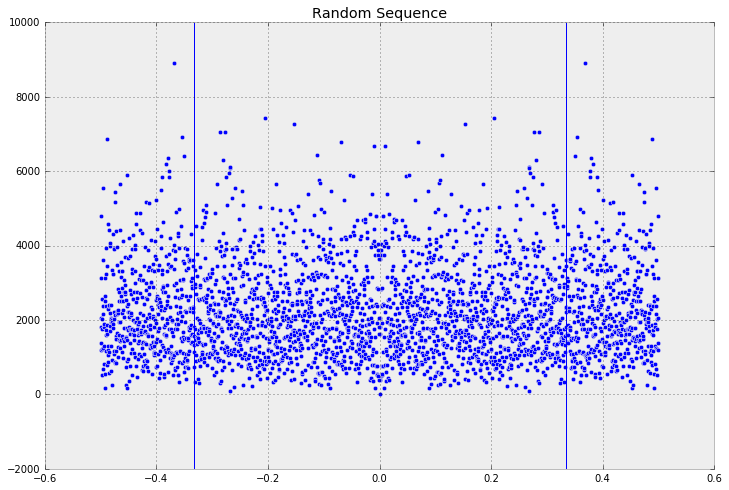

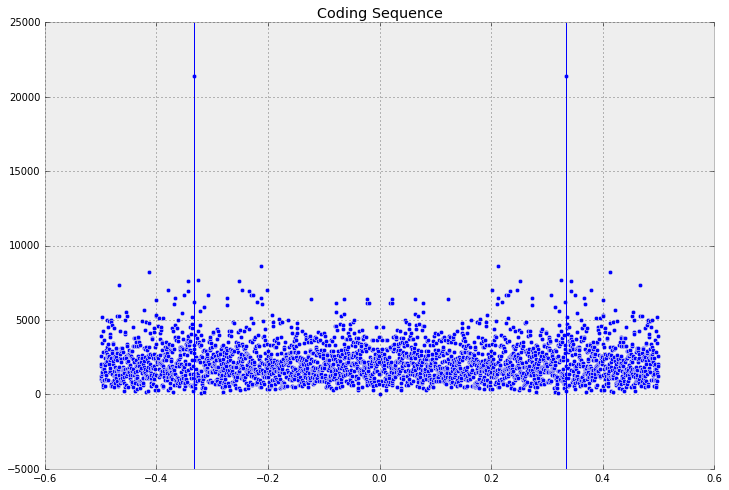

In [72]:
N = 3*1000

seq_coding = get_sequence_coding(N)
seq = get_sequence(N)

plot_power_spectrum(seq, title="Random Sequence")
plot_power_spectrum(seq_coding, title="Coding Sequence")